# Exploration of the box-office revenue of movies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
from IPython.display import display
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

In [2]:
# Data source: http://www.cs.cmu.edu/~ark/personas/

# Define the data path
CLEAN_DATA_PATH = 'clean_data/'

In [3]:
# Load the data
movies_df = pd.read_csv(CLEAN_DATA_PATH + 'movies.csv')
display(movies_df.head())

,wiki_id,id,name,release_date,revenue,runtime,area
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,Northen America
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,Northen America
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Other
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,Europe
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,Europe


### Release year

Before any further analysis, we will determine the release year from the release date for each film in order to discretize the temporal information in a more refined manner. This will simplify the temporal analysis of the data for further steps.

In [4]:
#creat a function to find the release year from a release date
def map_to_year(date):
    if type(date) == float and np.isnan(date):
        return "NA"
    elif len(str(date))==3:
        return str(date)
    else:
        return str(date[0:4])

movies_df["release_year"] = movies_df["release_date"].apply(lambda x: map_to_year(x))
display(movies_df.head())

#Remove the movies for which the release date is not specified
print("Number of movies: ", len(movies_df))
print("number of movies without a release_year:", sum(movies_df["release_year"] == "NA"))
movies_df = movies_df[movies_df["release_year"] != "NA"]
print("Number of movies after removing those without release date: ", len(movies_df))

,wiki_id,id,name,release_date,revenue,runtime,area,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,Northen America,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,Northen America,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Other,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,Europe,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,Europe,1983


Number of movies:  81741
number of movies without a release_year: 6902
Number of movies after removing those without release date:  74839


### Divide by region of interest

Then, we separate the data by creating individuals dataframe from the movies dataframe for each geographical region previously defined.

In [5]:
#Create a separate dataframe with data of each area
asia_movies_df = movies_df[movies_df["area"] == "Asia"]
europe_movies_df = movies_df[movies_df["area"] == "Europe"]
india_movies_df = movies_df[movies_df["area"] == "India"]
northen_america_movies_df = movies_df[movies_df["area"] == "Northen America"]

display(asia_movies_df.head())
display(europe_movies_df.head())
display(india_movies_df.head())
display(northen_america_movies_df.head())

,wiki_id,id,name,release_date,revenue,runtime,area,release_year
11,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974,NaN,89.0,Asia,1974
43,26878691,/m/0f400r,Mysterious Island,1982,NaN,100.0,Asia,1982
56,13281430,/m/03c0d85,My Name is Fame,2006,NaN,94.0,Asia,2006
108,24196090,/m/07k8x7p,The World of Geisha,1973-11-03,NaN,73.0,Asia,1973
114,17780234,/m/0479c20,Banana Club,1996-04-13,NaN,NaN,Asia,1996


,wiki_id,id,name,release_date,revenue,runtime,area,release_year
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,Europe,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,Europe,1983
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,Europe,1960
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,Europe,1989
16,30388930,/m/0g5qvzg,1919,1984,NaN,99.0,Europe,1984


,wiki_id,id,name,release_date,revenue,runtime,area,release_year
27,20604092,/m/0523t_1,Anbu Thozhi,2007-08-17,NaN,NaN,India,2007
30,11448183,/m/02rc_h4,Bindiya Chamkegi,1984-01-20,NaN,NaN,India,1984
31,9633533,/m/02pml15,Vandanam,1989,NaN,168.0,India,1989
35,29528534,/m/04j0lfk,Anokha Rishta,1986,NaN,180.0,India,1986
37,29772142,/m/0fq260_,Karayilekku Oru Kadal Dooram,2010-12-31,NaN,110.0,India,2010


,wiki_id,id,name,release_date,revenue,runtime,area,release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,Northen America,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,Northen America,2000
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,Northen America,1913
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,Northen America,1938
10,175026,/m/017n1p,Sarah and Son,1930,NaN,86.0,Northen America,1930


### Check for missing data in revenue

Before performing any analysis on this caracteristic, we need to check if there are some missing box-office revenue data. If so, we need to determine to which extent, in order to decide the best way to handle it, and determine how it could impact our analysis.

C:\Users\justi\AppData\Local\Temp\ipykernel_19656\2065227990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["revenue_is_na"] = df.revenue.isna()
C:\Users\justi\AppData\Local\Temp\ipykernel_19656\2065227990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["revenue_is_na"] = df.revenue.isna()
C:\Users\justi\AppData\Local\Temp\ipykernel_19656\2065227990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

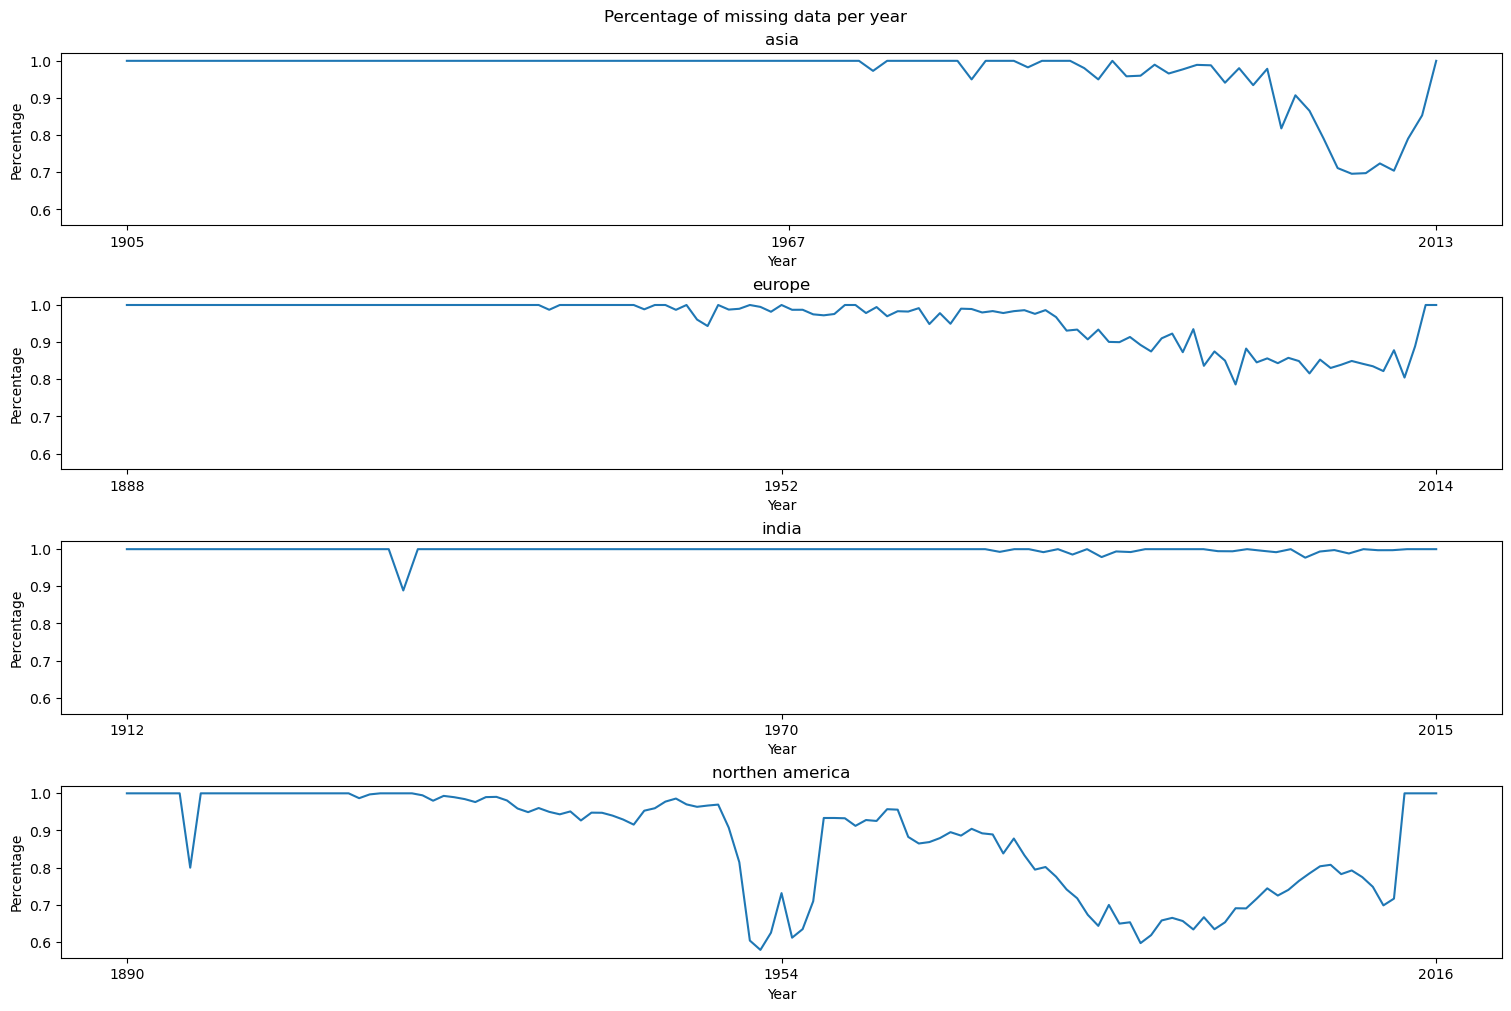

Percentage of missing data for genre:
- Asia: 90.09
- Europe: 93.19
- India: 99.65
- Northen America: 81.21


In [16]:
# compute the proportion of missing revenue data
def percentage_missing_data(df, region, ax):
    # Indicator variable showing that something is NA
    df["revenue_is_na"] = df.revenue.isna()

    # % of missing data
    missing_revenue_data = df.groupby("release_year").revenue_is_na.mean()
    
    # Plot it
    ax.plot(missing_revenue_data)
    ax.set(xlabel='Year', ylabel='Percentage')
    ax.set_title(region)
    x_values = ax.get_xticks()
    new_x = [x_values[i] for i in [0, len(x_values) //2, -1]]
    ax.set_xticks(new_x)
    
    #return overall percentage of missing data
    prop_missing_data=sum(df["revenue_is_na"])*100/len(df)
    return prop_missing_data

fig, axs = plt.subplots(4, sharey=True, figsize=(15, 10), layout='constrained')
fig.suptitle("Percentage of missing data per year")
prop_missing_asia=percentage_missing_data(asia_movies_df, "asia", axs[0])
prop_missing_europe=percentage_missing_data(europe_movies_df, "europe", axs[1])
prop_missing_india=percentage_missing_data(india_movies_df, "india", axs[2])
prop_missing_northen_america=percentage_missing_data(northen_america_movies_df, "northen america", axs[3])
plt.show()

# PrintOverall proportion of missing data
print("Percentage of missing data for genre:")
print("- Asia: %.2f" % prop_missing_asia)
print("- Europe: %.2f" % prop_missing_europe)
print("- India: %.2f" % prop_missing_india)
print("- Northen America: %.2f" % prop_missing_northen_america)

Overall there is between 81.21% to 99.65% of missing data for the different regions. More specifically, almost 100% of the revenue data is missing for India, as well as for long timespans for the three other regions. Therefore, we cannot perform meaningfull analysis. Indeed the dataset on revenue would not be of similar size between areas, and only some years would be represented in it. 
We thus decided not to analyze film revenue, and to focus on other parameters from which we will be able to extract more meaningfull parameters. 

# Exploration of the movies genre

In [7]:
# Load the data
movies_genres_df = pd.read_csv(CLEAN_DATA_PATH + 'movies_genres.csv')
display(movies_genres_df.head())

,movie_id,genre
0,/m/03vyhn,Thriller
1,/m/03vyhn,Science Fiction
2,/m/03vyhn,Horror
3,/m/03vyhn,Adventure
4,/m/03vyhn,Supernatural


### Divide by region of interest

We separate the data by creating individuals dataframe from the movies dataframe for each geographical region previously defined.

In [8]:
# Find the ID of the movies belonging to each region of interest
asia_id = asia_movies_df['id']
europe_id = europe_movies_df['id']
india_id = india_movies_df['id']
northen_america_id = northen_america_movies_df['id']

In [18]:
#Use the movie id to assign the geographical area to each movie genre
def assign_region(genre_df, region_id_df):
    region_movies_df = pd.merge(region_id_df, genre_df, right_on="movie_id", left_on="id")
    region_movies_df = region_movies_df.drop(columns=["movie_id"])
    return region_movies_df

asia_genres_df=assign_region(movies_genres_df, asia_movies_df)
display(asia_genres_df.head())
europe_genres_df=assign_region(movies_genres_df, europe_movies_df)
india_genres_df=assign_region(movies_genres_df, india_movies_df)
northen_america_genres_df=assign_region(movies_genres_df, northen_america_movies_df)

,wiki_id,id,name,release_date,revenue,runtime,area,release_year,revenue_is_na,genre
0,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974,NaN,89.0,Asia,1974,True,Crime Fiction
1,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974,NaN,89.0,Asia,1974,True,Thriller
2,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974,NaN,89.0,Asia,1974,True,Japanese Movies
3,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974,NaN,89.0,Asia,1974,True,World cinema
4,24229100,/m/07kjkz6,Lady Snowblood 2: Love Song of Vengeance,1974,NaN,89.0,Asia,1974,True,Action/Adventure


### Check for missing data in genre

As for the revenue, before performing any analysis on this caracteristic, we need to determine the proportion of missing data.

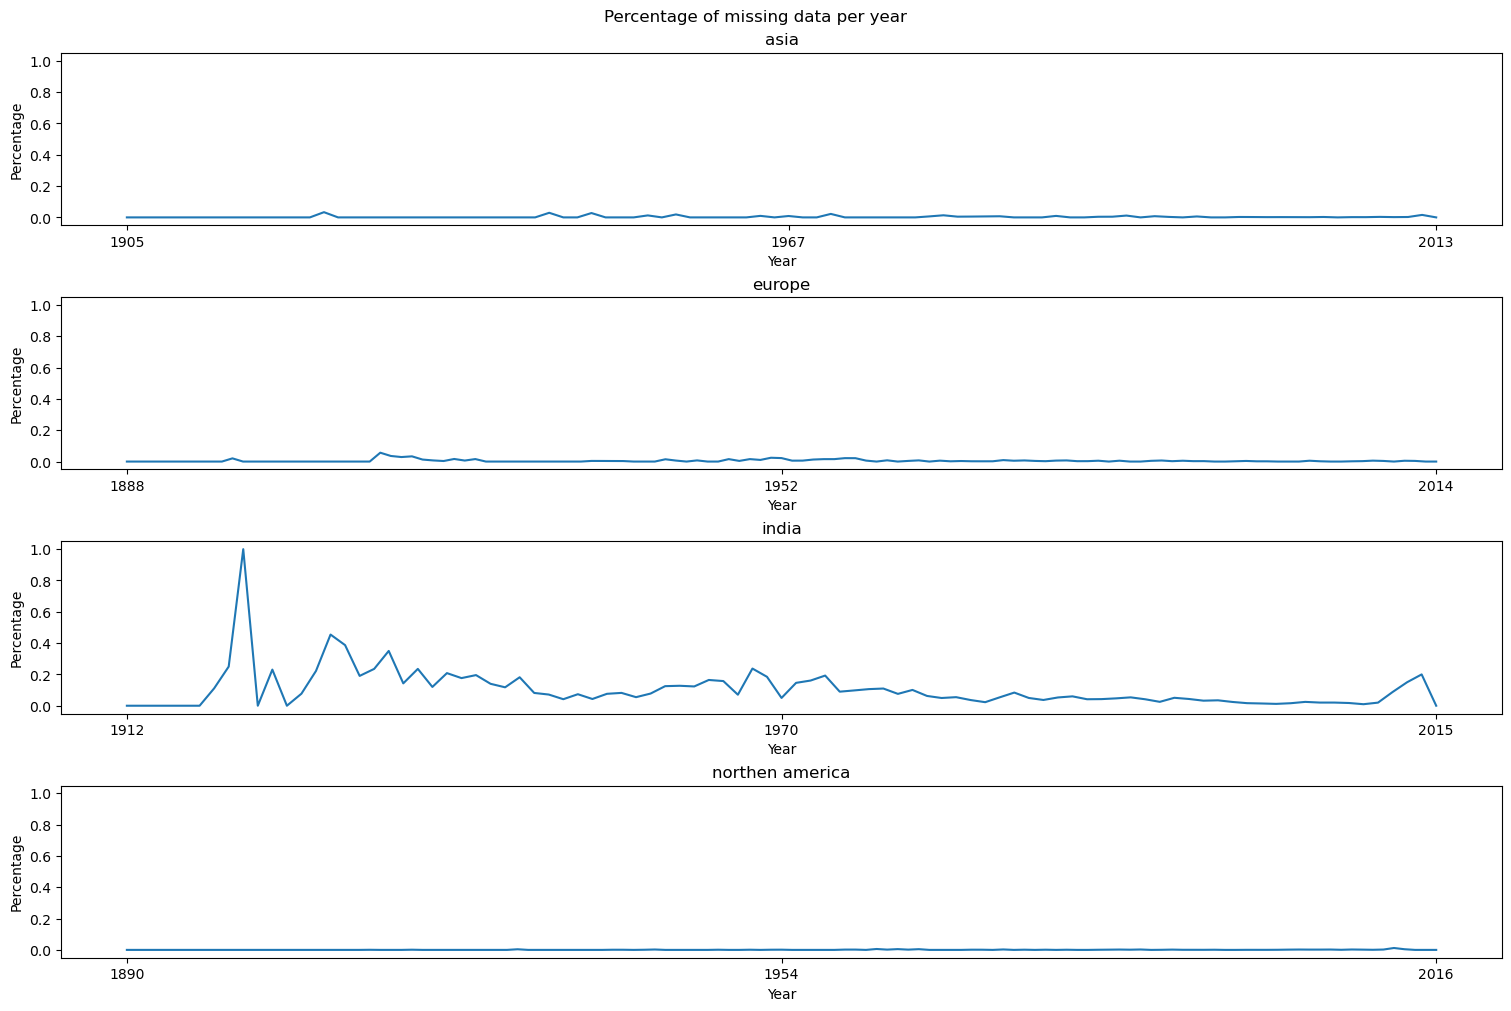

Percentage of missing data for genre:
- Asia: 0.29
- Europe: 0.45
- India: 5.29
- Northen America: 0.10


In [19]:
#Function to compute the proportion of missing data about movie genre
def percentage_missing_data(df, region, ax):
    # Indicator variable showing that something is NA
    df["genre_is_na"] = df.genre.isna()

    # % of missing data
    missing_genre_data = df.groupby("release_year").genre_is_na.mean()
    
    # Plot it
    ax.plot(missing_genre_data)
    ax.set(xlabel='Year', ylabel='Percentage')
    ax.set_title(region)
    x_values = ax.get_xticks()
    new_x = [x_values[i] for i in [0, len(x_values) //2, -1]]
    ax.set_xticks(new_x)
    
    #Compute overall percentage of missing data
    tot_missing_data=sum(df["genre_is_na"])*100/len(df)
    return tot_missing_data

fig, axs = plt.subplots(4, sharey=True, figsize=(15, 10), layout='constrained')
fig.suptitle("Percentage of missing data per year")
prop_tot_asia = percentage_missing_data(asia_genres_df, "asia", axs[0])
prop_tot_europe = percentage_missing_data(europe_genres_df, "europe", axs[1])
prop_tot_india = percentage_missing_data(india_genres_df, "india", axs[2])
prop_tot_northen_america = percentage_missing_data(northen_america_genres_df, "northen america", axs[3])
plt.show()

print("Percentage of missing data for genre:")
print("- Asia: %.2f" % prop_tot_asia)
print("- Europe: %.2f" % prop_tot_europe)
print("- India: %.2f" % prop_tot_india)
print("- Northen America: %.2f" % prop_tot_northen_america)

The quantity of missing data is really low for the movie genres, ranging from 0.29 to 5.29%. There are a bit more lacking data for indian movie (5.29%, only area wher eit is superior to 1%), but it is still reasonnable. Also, except from one year in India, missing data are relatibly well distributed over the years.
We thus decided to remove those movies for the following step of the genre analysis.

In [21]:
print("Removing films from which the genre is not specified:")
print("- Number of Asian movies before:", len(asia_genres_df))
asia_genres_df=asia_genres_df[~asia_genres_df["genre_is_na"]]
print("- Number of Asian movies after:", len(asia_genres_df))

print("- Number of European movies before:", len(europe_genres_df))
europe_genres_df=europe_genres_df[~europe_genres_df["genre_is_na"]]
print("- Number of European movies after:", len(europe_genres_df))

print("- Number of Indian movies before:", len(india_genres_df))
india_genres_df=india_genres_df[~india_genres_df["genre_is_na"]]
print("- Number of Indian movies after:", len(india_genres_df))

print("- Number of Northen American movies before:", len(northen_america_genres_df))
northen_america_genres_df=northen_america_genres_df[~northen_america_genres_df["genre_is_na"]]
print("- Number of Northen American movies after:", len(northen_america_genres_df))

Removing films from which the genre is not specified:
- Number of Asian movies before: 16098
- Number of Asian movies after: 16098
- Number of European movies before: 42596
- Number of European movies after: 42596
- Number of Indian movies before: 18780
- Number of Indian movies after: 18780
- Number of Northen American movies before: 128036
- Number of Northen American movies after: 128036


### Overview of the movie genre

Now that we handled missing data, let's have an overview of the different movie genre, in different geographical area!!

In [ ]:
# For each region, group the movies by their genre, and count the number of movies per genre
def group_by_genre(genre_df):
    genre_count = genre_df.explode('genre')
    genre_count = genre_df.groupby('genre').count()['id'].reset_index()
    genre_count = genre_count.rename(columns={'id': 'movies_count'})
    genre_count = genre_count.sort_values('movies_count', ascending=False)
    display(genre_count.head(10))
    return genre_count
    
asia_genre_count=group_by_genre(asia_genres_df)
europe_genre_count=group_by_genre(europe_genres_df)
india_genre_count=group_by_genre(india_genres_df)
northen_america_genre_count=group_by_genre(northen_america_genres_df)

#Print the number of different genres
print("Number of genre categories for Asian film: ", len(asia_genre_count))
print("Number of genre categories for European film: ", len(europe_genre_count))
print("Number of genre categories for Indian film: ", len(india_genre_count))
print("Number of genre categories for Northen American film: ", len(northen_america_genre_count))

,genre,movies_count
118,Japanese Movies,1877
71,Drama,1728
200,World cinema,1437
36,Chinese Movies,1242
0,Action,925
3,Action/Adventure,620
38,Comedy,596
125,Martial Arts Film,522
156,Romance Film,510
190,Thriller,469


,genre,movies_count
96,Drama,7219
60,Comedy,2809
306,World cinema,1975
250,Romance Film,1850
294,Thriller,1666
83,Crime Fiction,1617
36,Black-and-white,1140
63,Comedy film,1064
92,Documentary,1063
7,Adventure,971


,genre,movies_count
51,Drama,4584
116,Romance Film,2000
148,World cinema,1924
0,Action,1538
18,Bollywood,1308
97,Musical,1263
26,Comedy,922
142,Thriller,789
118,Romantic drama,716
62,Family Film,516


,genre,movies_count
107,Drama,13014
69,Comedy,9484
42,Black-and-white,6047
185,Indie,5460
284,Short Film,5243
319,Thriller,4782
2,Action,4356
268,Romance Film,4344
92,Crime Fiction,3540
285,Silent film,3523


Number of genre categories for Asian film:  203
Number of genre categories for European film:  308
Number of genre categories for Indian film:  149
Number of genre categories for Northen American film:  337


That's a lot of genre! Let's get rid of the ones that are really poorly represented, as our analysis will later focus on the main movie genre in each geographical regions. We decide to keep the genre that are present in at least 1% of the films.

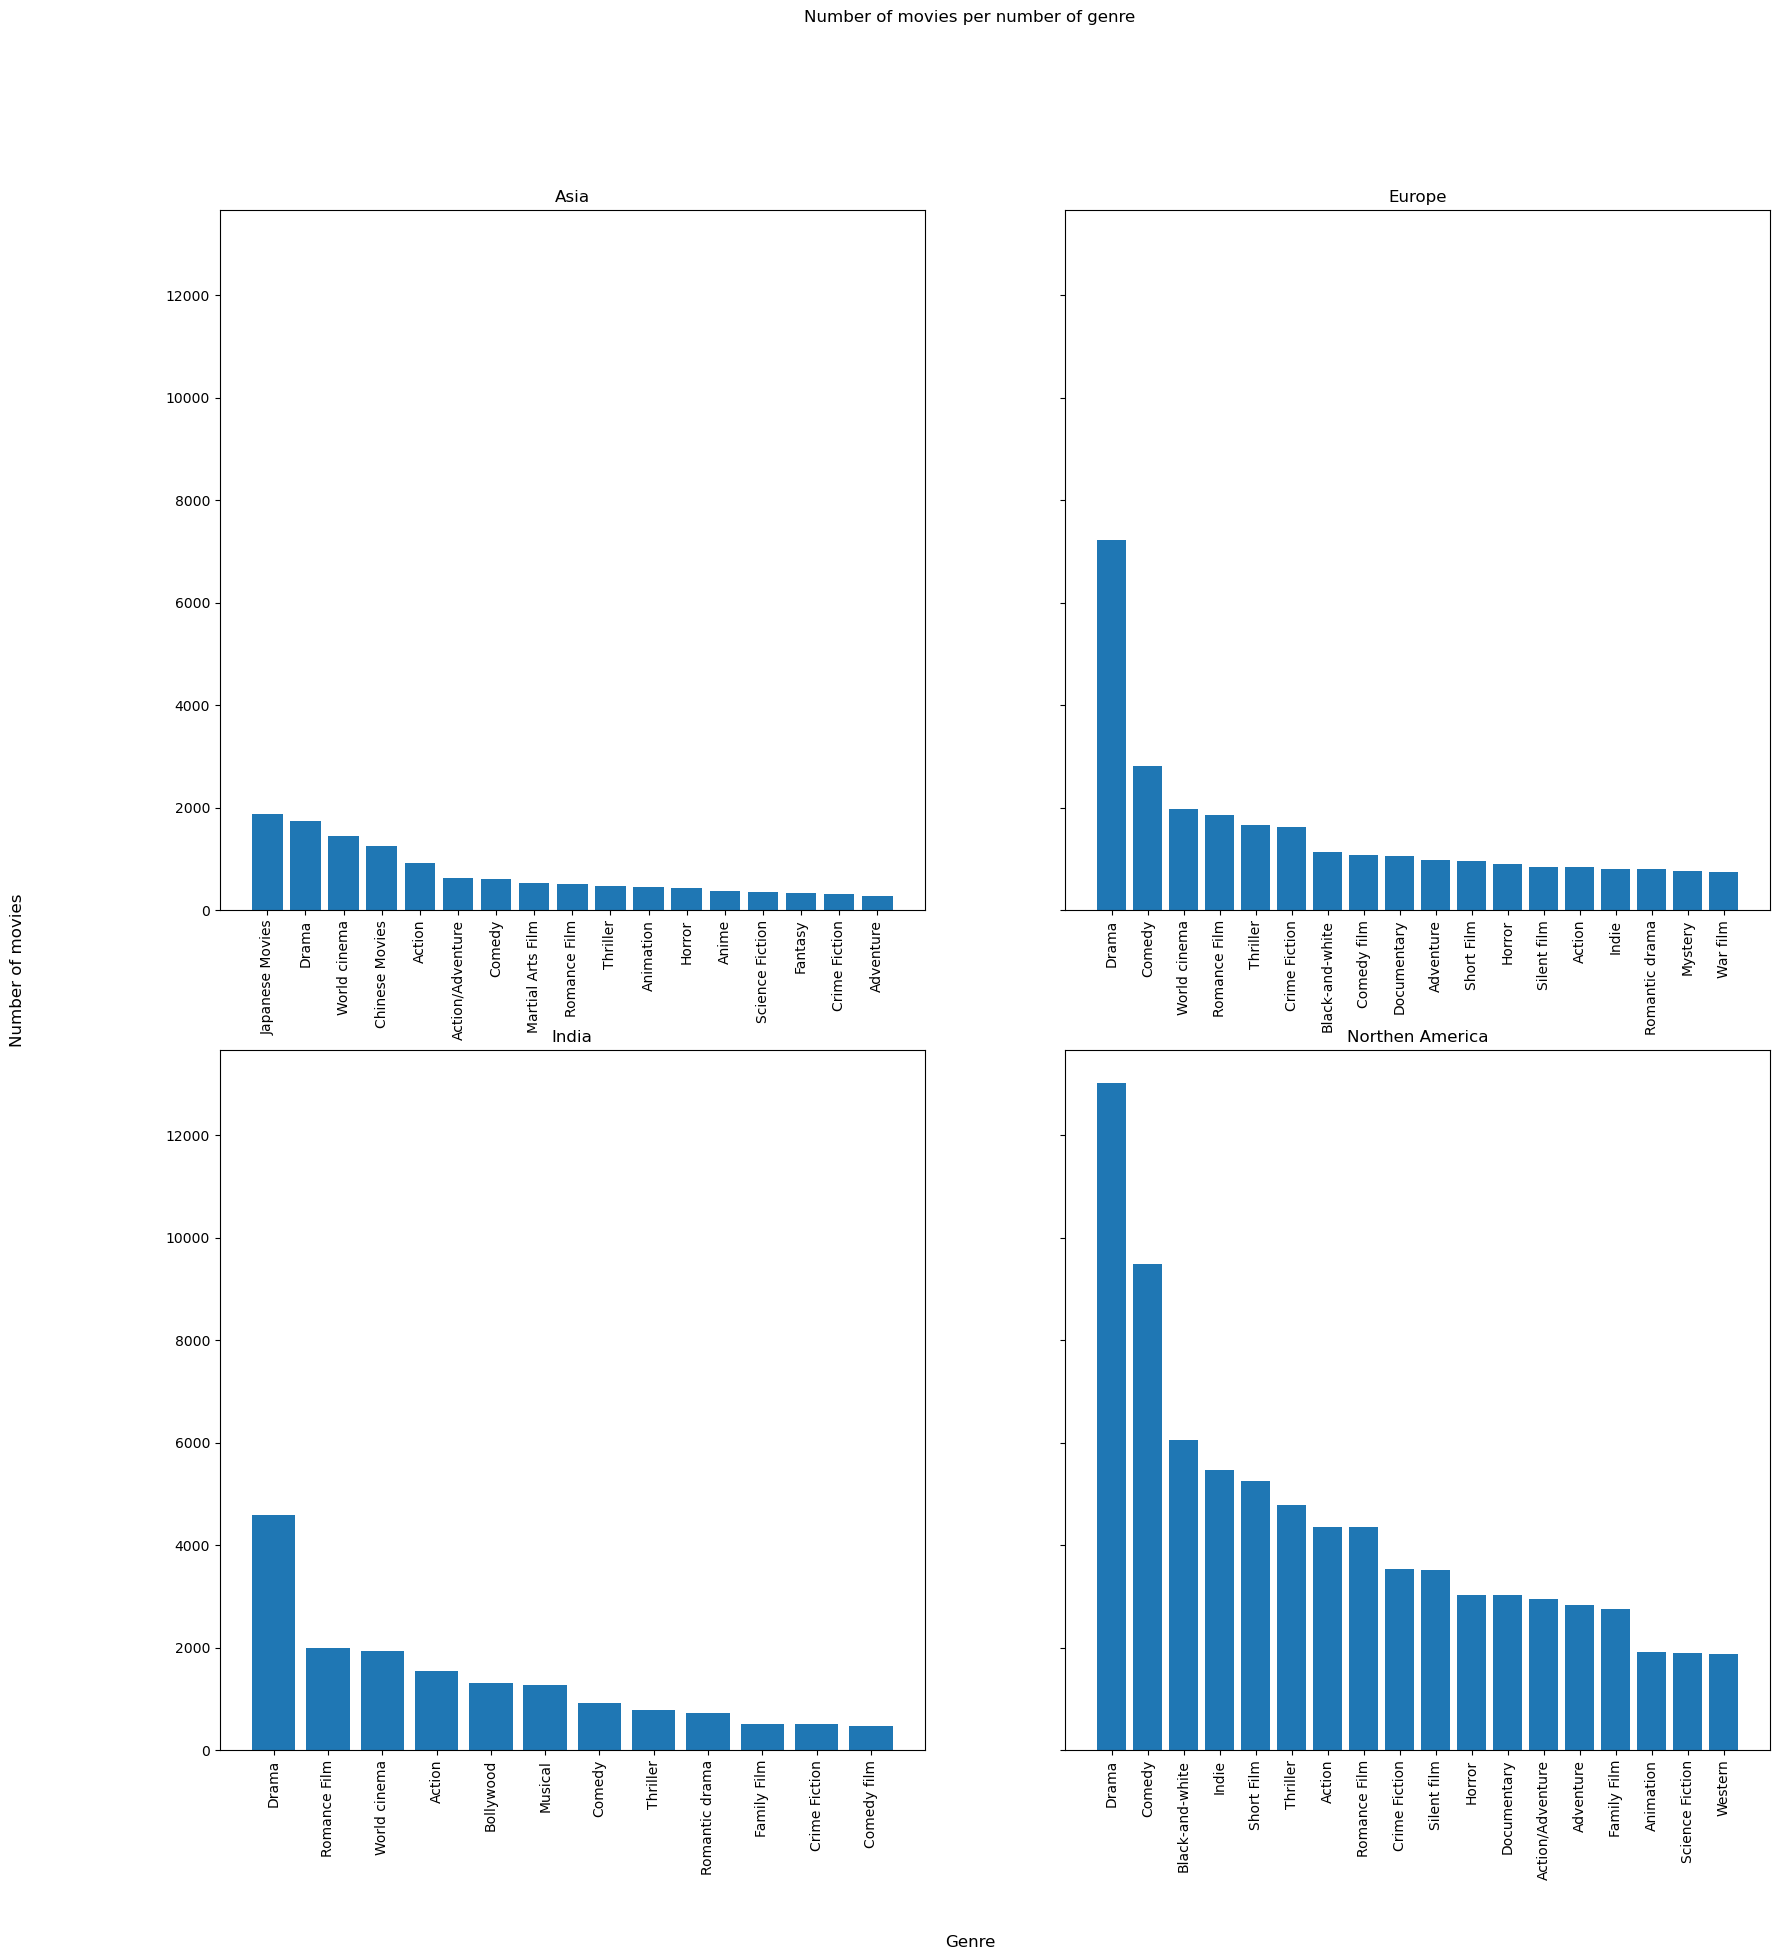

In [38]:
#Keep only genre that represents 1% of the movie
asia_genre_count=asia_genre_count[asia_genre_count["movies_count"]/asia_genre_count["movies_count"].sum()>0.02]
europe_genre_count=europe_genre_count[europe_genre_count["movies_count"]/europe_genre_count["movies_count"].sum()>0.02]
india_genre_count=india_genre_count[india_genre_count["movies_count"]/india_genre_count["movies_count"].sum()>0.02]
northen_america_genre_count=northen_america_genre_count[northen_america_genre_count["movies_count"]/northen_america_genre_count["movies_count"].sum()>0.02]

#Overview of those genres
fig, ax=plt.subplots(2,2, figsize=(20, 20), sharey=True)
ax[0][0].bar(asia_genre_count.genre, asia_genre_count.movies_count)
ax[0][0].tick_params(axis='x', rotation=90)
ax[0][0].set_title('Asia')
ax[0][1].bar(europe_genre_count.genre, europe_genre_count.movies_count)
ax[0][1].tick_params(axis='x', rotation=90)
ax[0][1].set_title('Europe')
ax[1][0].bar(india_genre_count.genre, india_genre_count.movies_count)
ax[1][0].tick_params(axis='x', rotation=90)
ax[1][0].set_title('India')
ax[1][1].bar(northen_america_genre_count.genre, northen_america_genre_count.movies_count)
ax[1][1].tick_params(axis='x', rotation=90)
ax[1][1].set_title('Northen America')
fig.supxlabel('Genre')
fig.supylabel('Number of movies')
fig.suptitle('Number of movies per number of genre')
#plt.grid(linestyle='--', alpha=0.7)
#plt.yscale('log')
plt.show()

We can already observe that there is some common proficient genre, drama being in the top 3 of each geographical areas for example.
But some seems to be more specific to a given area, like martial art in Asia or Western in Northen America.
We will dive further in the analysis of those common points and differencies during the next milestone of the project.

In [ ]:
############# END OF NOTEBOOK ############

### CCDF of revenue

Text(0.5, 1.0, 'CCDF Revenue')

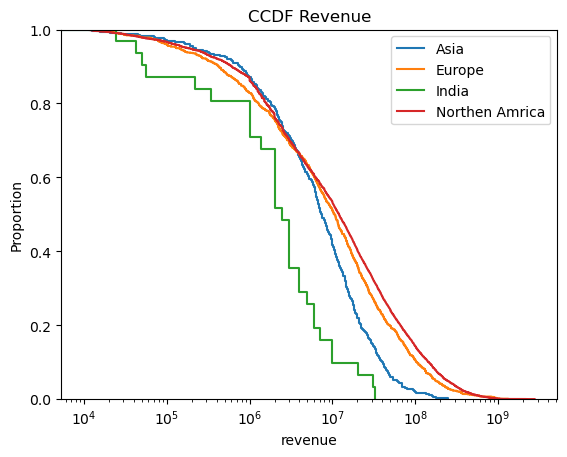

In [14]:
# Creates complementary CDF
sns.ecdfplot(asia_movies_df.revenue, label="Asia", complementary=True)
sns.ecdfplot(europe_movies_df.revenue, label="Europe", complementary=True)
sns.ecdfplot(india_movies_df.revenue, label="India", complementary=True)
sns.ecdfplot(northen_america_movies_df.revenue, label="Northen Amrica", complementary=True)
plt.xscale("log")
plt.legend()
plt.title("CCDF Revenue")

In [15]:
def plot_ci_revenue:
    revenues = asia_movies_df.revenue.agg(["mean", "sem"])
    revenues["low_ci"] = revenues["mean"] - 1.96 * revenues["sem"]
    revenues["high_ci"] = revenues["mean"] + 1.96 * revenues["sem"]

# shows confidence intervals
display(revenues)

# simple plot
sns.pointplot(x="throws", y="salary", data=df_pitching)
plt.title("tudum");

SyntaxError: invalid syntax (3504622802.py, line 1)